In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import os
from torchvision import models
from util import load_data, model_train, model_test, metrics_plot
device = torch.device("cuda")
from hyperparameters import(
        PATH,
        save_path,
        learning_rate,
        batch_size,
        num_epochs,
        image_resize,
        num_each_class,
        val_ratio,
        test_ratio)

In [3]:
# Create DataLoaders if needed
train_loader, val_loader, test_loader = load_data(path=PATH, num=num_each_class, val_ratio=val_ratio, test_ratio=test_ratio, batch_size=batch_size, image_resize=image_resize)

Train size: 7500, Val size: 3000, Test size: 4500
Time for loading data: 97.71s


In [4]:
# swin_t
model = models.swin_t(weights='DEFAULT')
name = 'swin_t.pth'
name = os.path.join(save_path, name)

num_features = model.head.in_features
model.head = torch.nn.Linear(num_features, 10)

# load model
# model.load_state_dict(torch.load(name))

# Define loss function
criterion = torch.nn.CrossEntropyLoss()
criterion = criterion.to(device)
# Define optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

accs, losses = model_train(model, optimizer, criterion, device, train_loader, val_loader, num_epochs)
pred, true = model_test(model, criterion, device, test_loader)

# Save the state dictionary of the model
torch.save(model.state_dict(), name)

Total parameters: 27527044
Trainable parameters: 27527044


100%|██████████| 188/188 [00:25<00:00,  7.51it/s]


Epoch 1/3
Train Loss: 0.5135, Train Acc: 83.6087
Val Loss: 0.0762, Val Acc: 97.81


100%|██████████| 188/188 [00:25<00:00,  7.48it/s]


Epoch 2/3
Train Loss: 0.1150, Train Acc: 96.8417
Val Loss: 0.0625, Val Acc: 98.14


100%|██████████| 188/188 [00:25<00:00,  7.46it/s]


Epoch 3/3
Train Loss: 0.0585, Train Acc: 98.4808
Val Loss: 0.0880, Val Acc: 97.47
Training time: 457.14s


100%|██████████| 282/282 [00:38<00:00,  7.37it/s]


Test Loss: 0.1139, Test Acc: 96.90


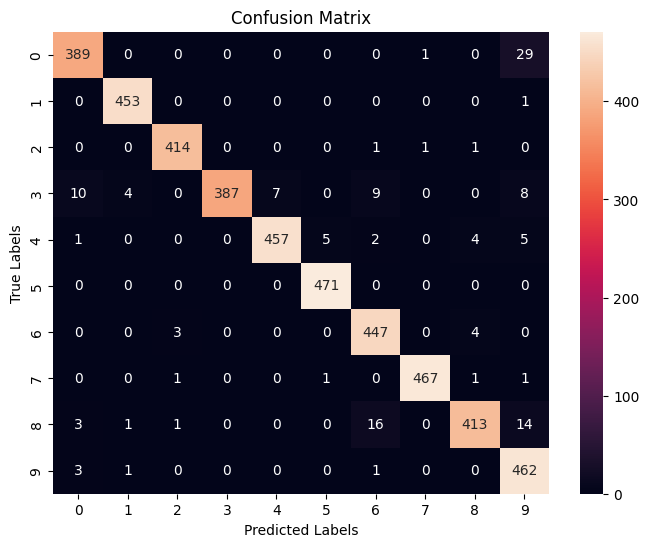

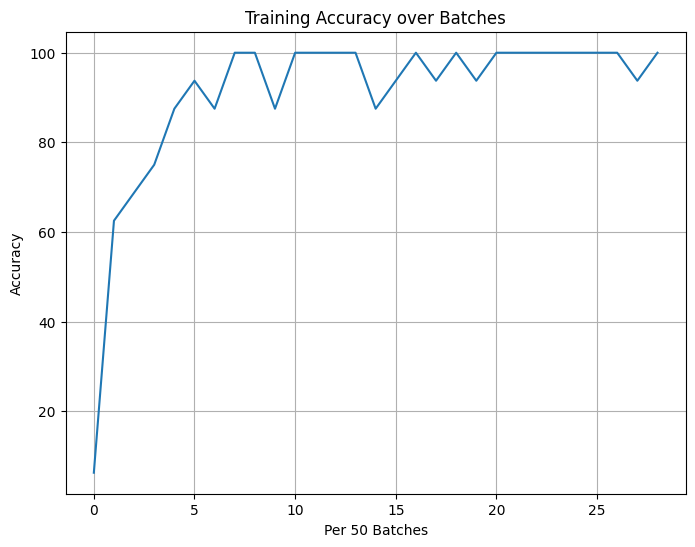

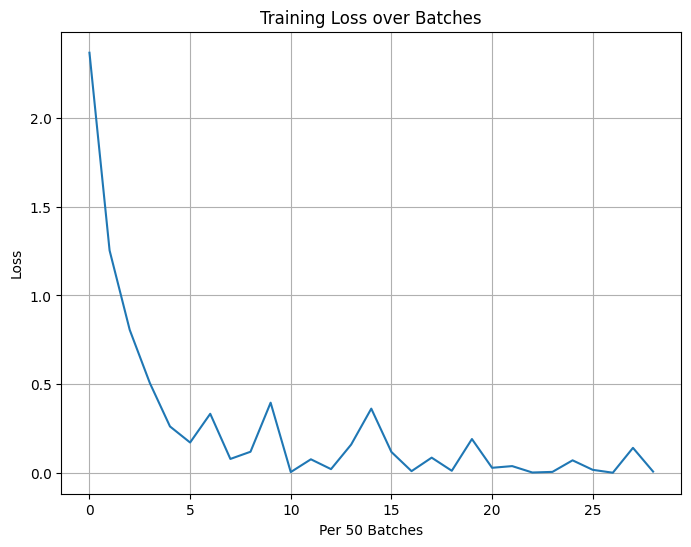

In [5]:
metrics_plot(pred, true, accs, losses, 50)

In [6]:
# vit
model = models.vit_b_16(weights='DEFAULT')
name = 'vit.pth'
name = os.path.join(save_path, name)

num_features = model.heads[-1].in_features
model.heads[-1] = torch.nn.Linear(num_features, 10)

# load model
# model.load_state_dict(torch.load(name))

# Define loss function
criterion = torch.nn.CrossEntropyLoss()
criterion = criterion.to(device)
# Define optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

accs, losses = model_train(model, optimizer, criterion, device, train_loader, val_loader, num_epochs)
pred, true = model_test(model, criterion, device, test_loader)

# Save the state dictionary of the model
torch.save(model.state_dict(), name)

Total parameters: 85806346
Trainable parameters: 85806346


  0%|          | 0/469 [00:00<?, ?it/s]D:\Anaconda\envs\pytorch-gpu\lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
100%|██████████| 188/188 [00:42<00:00,  4.46it/s]


Epoch 1/3
Train Loss: 0.4736, Train Acc: 84.4483
Val Loss: 0.1492, Val Acc: 95.31


100%|██████████| 188/188 [00:42<00:00,  4.44it/s]


Epoch 2/3
Train Loss: 0.1330, Train Acc: 95.9088
Val Loss: 0.1551, Val Acc: 95.84


100%|██████████| 188/188 [00:42<00:00,  4.46it/s]


Epoch 3/3
Train Loss: 0.0842, Train Acc: 97.5480
Val Loss: 0.0855, Val Acc: 97.51
Training time: 907.22s


100%|██████████| 282/282 [01:02<00:00,  4.48it/s]


Test Loss: 0.0921, Test Acc: 97.38


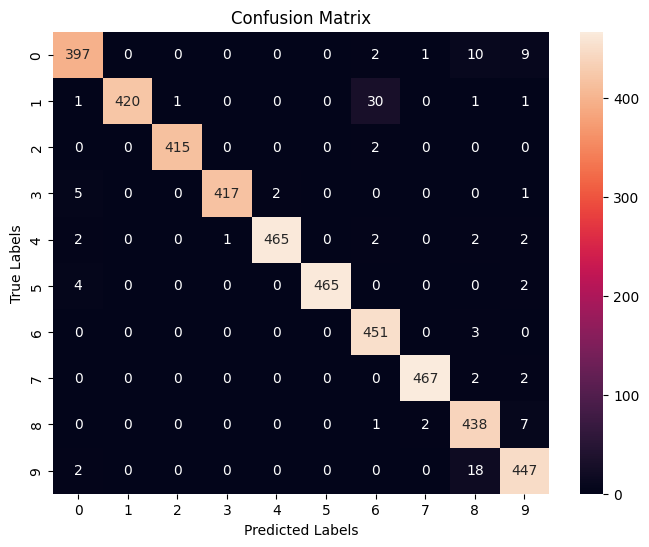

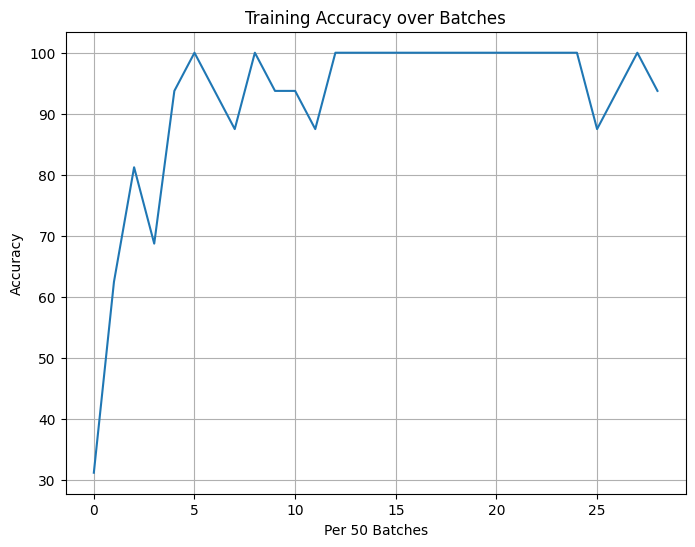

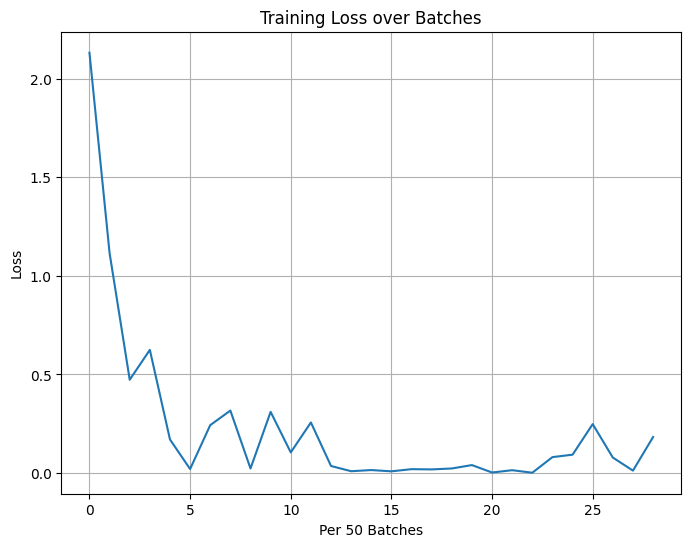

In [7]:
metrics_plot(pred, true, accs, losses, 50)